# 1. 가위바위보 분류기 만들기
먼저 데이터를 직접 준비하기 위해, 구글의 [teachable machine](https://teachablemachine.withgoogle.com/)사이트에 접속을 해서 카메라로 자신의 손모양(가위, 바위, 보)를 찍어서 저장한다.

In [14]:
# 폴더를 3개 만들고 그 안에 가위는 가위끼리 바위는 바위끼리 저장한다.
mkdir -p ~/aiffel/rock_scissor_paper/scissor
mkdir -p ~/aiffel/rock_scissor_paper/rock
mkdir -p ~/aiffel/rock_scissor_paper/paper

# ls -l로 잘 만들어졌는지 확인해보자
ls -l ~/aiffel/rock_scissor_paper

SyntaxError: invalid syntax (<ipython-input-14-81e6cb6bf7d2>, line 2)

In [21]:
# 자 이제 본격적으로 데이터를 정제하기 전에 몇가지 작업이 필요하다.
# pip명령어로 pillow라이브러리를 설치하고 그 안에 있는 image를 import시킨다
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [22]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽는다
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac3/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [23]:
# 위의 가위 이미지를 읽어들이는 코드와 마찬가지로, 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들인다
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  
# 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac3/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [24]:
# 똑같이, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들인다
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac3/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


In [25]:
# 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어본다.
import numpy as np
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=6900   # 가위바위보 데이터 총합을 뜻한다
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

#주석 처리해 놓은 부분은 트레인 데이터와 테스트 데이터를 분할하면서 골고루 섞어주는 코드인데 여기서는 쓰지 않겠다.
'''from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_norm, y_train, test_size=0.3, shuffle=True, stratify=y_train, random_state=222)
print(x.shape, y.shape)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)'''

학습데이터(x_train)의 이미지 개수는 6900 입니다.
x_train shape: (6900, 28, 28, 3)
y_train shape: (6900,)


'from sklearn.model_selection import train_test_split\nx_train, x_test, y_train, y_test = train_test_split(x_train_norm, y_train, test_size=0.3, shuffle=True, stratify=y_train, random_state=222)\nprint(x.shape, y.shape)\nprint(x_train.shape, x_test.shape, y_train.shape, y_test.shape)'

라벨:  0


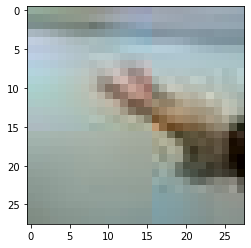

In [27]:
# matplotlib 안에 있는 함수를 사용하여 데이터를 정제한뒤의 이미지를 한번 살펴보자
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
print('라벨: ', y_train[0])

In [28]:
# 딥러닝 네트워크를 설계하기 위해서 tensorflow와 numpy 라이브러리를 추가하고 진행한다
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 값을 변경할 수 있는 하이퍼파라미터들을 여기 모아두었다
n_channel_1=24
n_channel_2=32
n_dense=48
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 24)        672       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        6944      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 48)                38448     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [32]:
# 모델을 훈련시켜보자
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9935
Epoch 2/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9957
Epoch 3/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9975
Epoch 4/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9972
Epoch 5/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9829
Epoch 6/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9948
Epoch 7/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9971
Epoch 8/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9988
Epoch 9/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9958
Epoch 10/15
216/216 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9996

In [33]:
# 훈련을 시켰으면 제대로 훈련이 됐는지 테스트를 해야할 것이다. 일단 그 전에 테스트 데이터셋을 만들어주자(훈련 데이터셋을 만들것과 동일한 방식으로 만들어준다)
import numpy as np
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합을 넣어줘야한다.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성한다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [34]:
# 위와 같이 테스트 데이트셋을 만들었으니, 이것으로 테스트를 해보고 모델의 정확도를 확인해본다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 274.8966 - accuracy: 0.7100
test_loss: 274.8966064453125 
test_accuracy: 0.7099999785423279


# 회고
처음에는 훈련 데이터셋을 가위,바위,보 각각 100개씩 해서 총 300개로 하고 학습을 시켰더니, 정확도가 0.3~0.4로 낮았다. 그러나 다른 팀원의 데이터셋을 추가한 결과 정확도가 높아졌다. 결국, 정확도가 처음에 낮게 나왔다는 것은 학습 데이터에 지나치게 과적합 되었다라고 보면 되는데, 이것을 해결하기 위해서는 데이터셋의 개수를 늘리기, 모델의 복잡도 줄이기, 드롭아웃, 가중치 규제 등의 방법이 있다. 그 유명한 MNIST의 손글씨 트레이닝 셋이 60000개고 내 데이터셋은 고작 6900에 불과하니 대략 9배 차이나 나는 것이다. 물론 정확도를 높이기 위한 방법은 위에서 나열한 방법말고도 훈련 데이터셋에서 정확하지 않은(가위인데 가위같이 생기지 않았거나) 데이터셋을 제거하거나, 이미지의 픽셀(여기서는 28x28로 크기를 줄였다)을 원본 화질 그대로 사용해서 질 좋은 데이터셋을 사용하는 방법도 있지만 여기서는 쓰지 않았다. 정리하자면, 이번 프로젝트에서는 데이터셋의 중요성과 전처리에서부터 학습까지의 프로세스를 대략적으로 학습해보는 계기가 되었다고 생각한다.